##Importação das bibliotécas/módulos utilizados

In [1]:
import json
import requests

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import cross_validate, KFold

##Pré-processamento

In [3]:
columns = requests.get(
    "https://raw.githubusercontent.com/matheuss3/trabalho-2-in/main/data/columns.json"
    ).json()
columns

['erythema',
 'scaling',
 'definite_borders',
 'itching',
 'koebner_phenomenon',
 'polygonal_papules',
 'follicular_papules',
 'oral_mucosal_involvement',
 'knee_and_elbow_involvement',
 'scalp_involvement',
 'family_history',
 'melanin_incontinence',
 'eosinophils_in_the_infiltrate',
 'pnl_infiltrate',
 'fibrosis_of_the_papillary_dermis',
 'exocytosis',
 'acanthosis',
 'hyperkeratosis',
 'parakeratosis',
 'clubbing_of_the_rete_ridges',
 'elongation_of_the_rete_ridges',
 'thinning_of_the_suprapapillary_epidermis',
 'spongiform_pustule',
 'munro_microabcess',
 'focal_hypergranulosis',
 'disappearance_of_the_granular_layer',
 'vacuolisation_and_damage_of_basal_layer',
 'spongiosis',
 'saw_tooth_appearance_of_retes',
 'follicular_horn_plug',
 'perifollicular_parakeratosis',
 'inflammatory_monoluclear_inflitrate',
 'band_like_infiltrate',
 'age',
 'classification']

In [4]:
urlDataset = "https://raw.githubusercontent.com/matheuss3/trabalho-2-in/main/data/dermatology.data"
dataset = pd.read_csv(urlDataset, names=columns)
dataset.head(5)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,pnl_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw_tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band_like_infiltrate,age,classification
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


In [5]:
print("Dimensoes dimensões:", dataset.shape)

Dimensoes dimensões: (366, 35)


In [6]:
meanAge = int(dataset[dataset["age"] != '?'].astype("int").age.mean())
print("Média das idades:", meanAge)

dataset["age"] = dataset["age"].replace('?', meanAge)
dataset["age"] = dataset["age"].astype("int")
dataset.info()

Média das idades: 36
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   erythema                                  366 non-null    int64
 1   scaling                                   366 non-null    int64
 2   definite_borders                          366 non-null    int64
 3   itching                                   366 non-null    int64
 4   koebner_phenomenon                        366 non-null    int64
 5   polygonal_papules                         366 non-null    int64
 6   follicular_papules                        366 non-null    int64
 7   oral_mucosal_involvement                  366 non-null    int64
 8   knee_and_elbow_involvement                366 non-null    int64
 9   scalp_involvement                         366 non-null    int64
 10  family_history                           

9. Class Distribution:
       Database:  Dermatology
       
       Class code:   Class:                         Number of instances:
       1             psoriasis			          112
       2             seboreic dermatitis             61
       3             lichen planus                   72
       4             pityriasis rosea                49
       5             cronic dermatitis               52    
       6             pityriasis rubra pilaris        20

In [7]:
dataset["classification"] = dataset["classification"].replace(1, 'psoriasis')
dataset["classification"] = dataset["classification"].replace(2, 'seboreic_dermatitis')
dataset["classification"] = dataset["classification"].replace(3, 'lichen_planus')
dataset["classification"] = dataset["classification"].replace(4, 'pityriasis_rosea')
dataset["classification"] = dataset["classification"].replace(5, 'cronic_dermatitis')
dataset["classification"] = dataset["classification"].replace(6, 'pityriasis_rubra_pilaris')

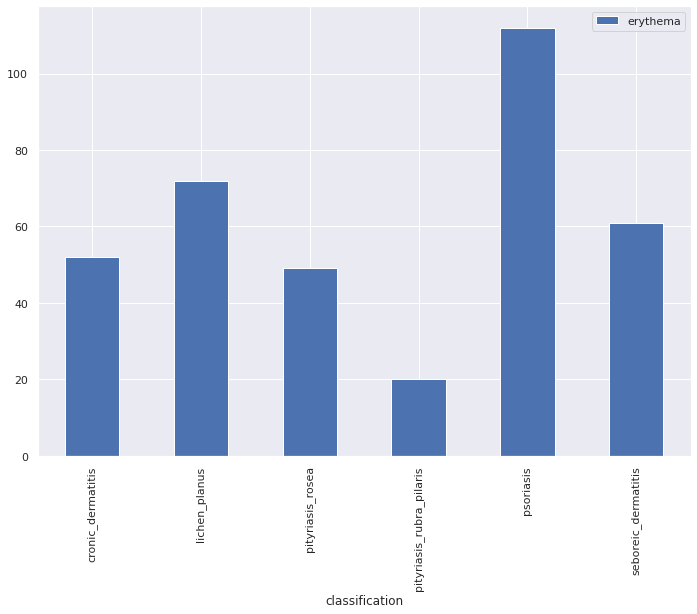

In [8]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
datasetAgrup = dataset.groupby(["classification"]).count()
datasetAgrup.plot.bar(y=0)

In [9]:
bins = [0, 13, 25, 60, 120]
labels = ['Crianças', 'Jovens', 'Adultos', 'Idosos']
dataset2 = dataset.copy()
dataset2['age_group'] = pd.cut(dataset['age'], bins=bins, labels=labels, right=False)
dataset2.head(5)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,pnl_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw_tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band_like_infiltrate,age,classification,age_group
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,seboreic_dermatitis,Adultos
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,psoriasis,Crianças
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,lichen_planus,Adultos
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,psoriasis,Adultos
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,lichen_planus,Adultos


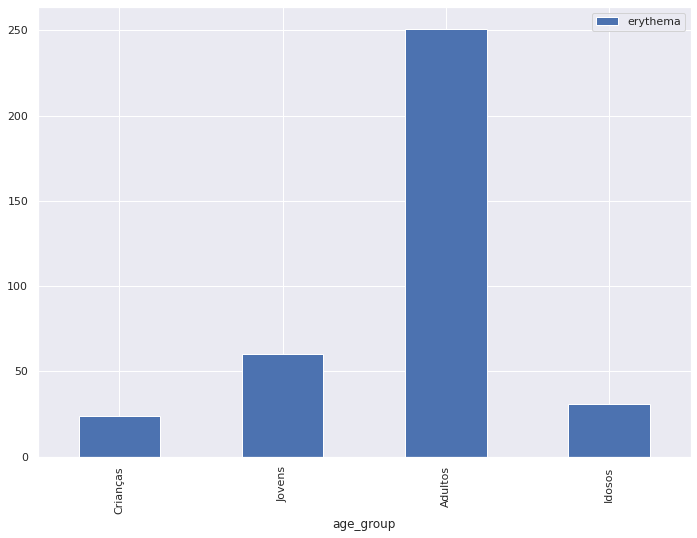

In [10]:
datasetAgrup = dataset2.groupby(["age_group"]).count()
datasetAgrup.plot.bar(y=0)

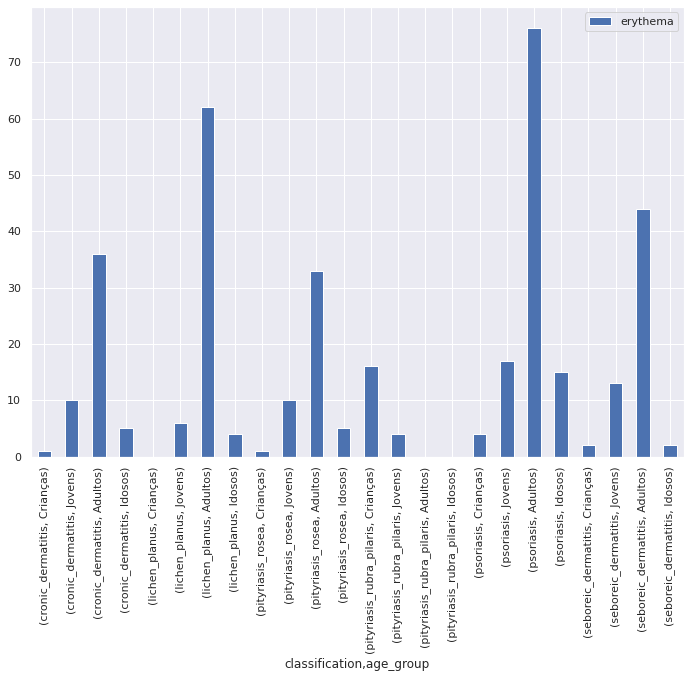

In [11]:
datasetAgrup = dataset2.groupby(["classification", "age_group"]).count()
datasetAgrup.plot.bar(y=0)

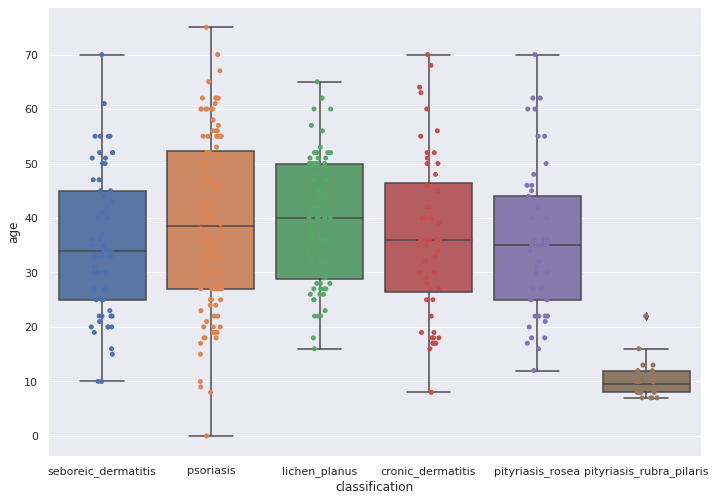

In [12]:
ax = sns.boxplot(x='classification', y='age', data=dataset)
ax = sns.stripplot(x='classification', y='age', data=dataset)

Balancemento


In [13]:
qtdOcorrencias = 61
df_1 = dataset[dataset["classification"] == 'psoriasis'].sample(qtdOcorrencias, replace=True)
df_2 = dataset[dataset["classification"] == 'seboreic_dermatitis'].sample(qtdOcorrencias, replace=True)
df_3 = dataset[dataset["classification"] == 'lichen_planus'].sample(qtdOcorrencias, replace=True)
df_4 = dataset[dataset["classification"] == 'pityriasis_rosea'].sample(qtdOcorrencias, replace=True)
df_5 = dataset[dataset["classification"] == 'cronic_dermatitis'].sample(qtdOcorrencias, replace=True)
df_6 = dataset[dataset["classification"] == 'pityriasis_rubra_pilaris'].sample(qtdOcorrencias, replace=True)
df_balanceado = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6], axis=0)
df_balanceado.shape

(366, 35)

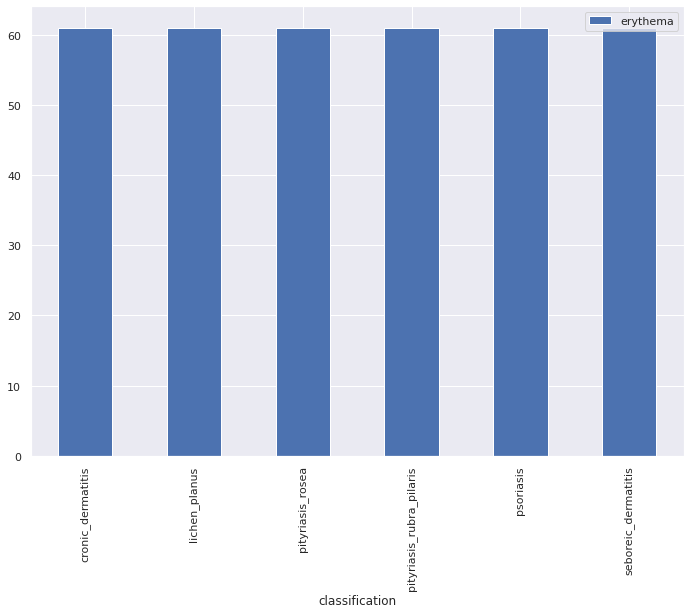

In [14]:
datasetAgrup = df_balanceado.groupby(["classification"]).count()
datasetAgrup.plot.bar(y=0)

##Arvore de decisão

In [15]:
X_train,X_test,y_train,y_test = train_test_split(df_balanceado.drop(['classification'], axis=1), 
                                                 df_balanceado['classification'], 
                                                 train_size = 0.60, test_size = 0.40,
                                                 random_state=0, shuffle=True)

In [16]:
modelo = tree.DecisionTreeClassifier(random_state=0)
modelo.fit(X_train, y_train)
score_treino = modelo.score(X_train, y_train)
print('Score de Acuracia [TREINO]:',score_treino)
score_teste = modelo.score(X_test, y_test)
print('Score de Acuracia [TESTE]:',score_teste)

Score de Acuracia [TREINO]: 1.0
Score de Acuracia [TESTE]: 0.9659863945578231


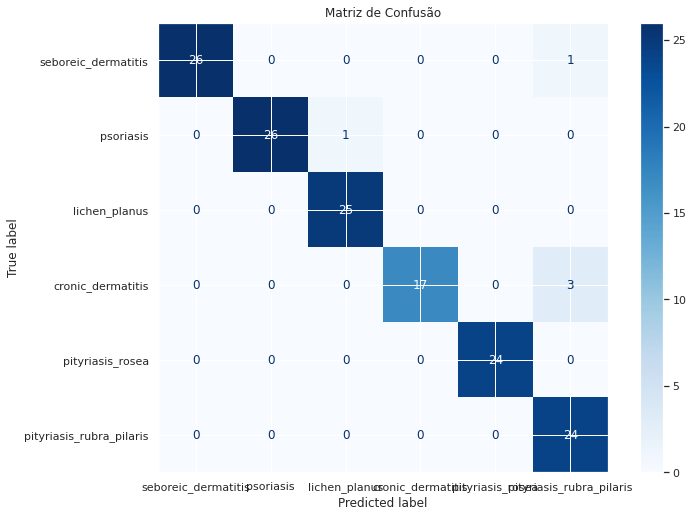

In [17]:

disp = plot_confusion_matrix(modelo, X_test, y_test,
                              display_labels=dataset['classification'].drop_duplicates().array,
                              cmap=plt.cm.Blues)
disp.ax_.set_title('Matriz de Confusão')

plt.show()

In [18]:
predicted = modelo.predict(X_test)
report = classification_report(y_test, predicted)
print('====================================== Report ======================================')
print(report)

====================================== Report ======================================
                          precision    recall  f1-score   support

       cronic_dermatitis       1.00      0.96      0.98        27
           lichen_planus       1.00      0.96      0.98        27
        pityriasis_rosea       0.96      1.00      0.98        25
pityriasis_rubra_pilaris       1.00      0.85      0.92        20
               psoriasis       1.00      1.00      1.00        24
     seboreic_dermatitis       0.86      1.00      0.92        24

                accuracy                           0.97       147
               macro avg       0.97      0.96      0.96       147
            weighted avg       0.97      0.97      0.97       147



In [19]:
scoring = ['accuracy', 'recall_macro', 'f1_macro', 'precision_macro']
kfold = KFold(n_splits = 5, random_state = 5, shuffle = True)
cv_results1 = cross_validate(modelo, X_test, y_test, cv = kfold, scoring = scoring)

print('Accuracy mean:  ', cv_results1['test_accuracy'].mean())
print('Precision mean: ', cv_results1['test_precision_macro'].mean())
print('Recall mean:    ', cv_results1['test_recall_macro'].mean())
print('F1 mean:        ', cv_results1['test_f1_macro'].mean())

Accuracy mean:   0.9662068965517241
Precision mean:  0.9732936507936507
Recall mean:     0.9712962962962963
F1 mean:         0.9689588223953549


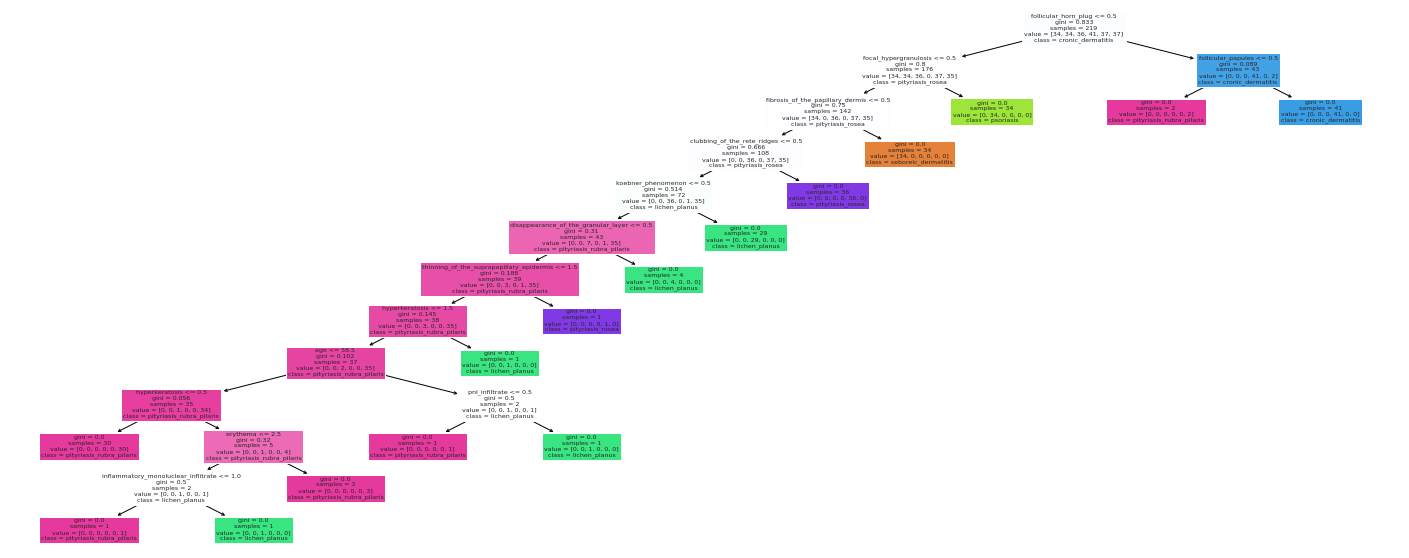

In [20]:
fig = plt.figure(figsize=(25,10))

out = tree.plot_tree(modelo, 
                     feature_names=columns[:34], 
                     class_names=dataset['classification'].drop_duplicates().array, 
                     filled=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

fig.savefig('tree.png')

##KMeans

In [21]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(df_balanceado.drop(['classification'], axis=1))

In [22]:
predicted = kmeans.predict(df_balanceado.drop(['classification'], axis=1))
df_predicted = pd.DataFrame(predicted, columns=['classification'])
df_predicted.value_counts()

classification
3                 83
2                 67
5                 60
4                 60
1                 53
0                 43
dtype: int64

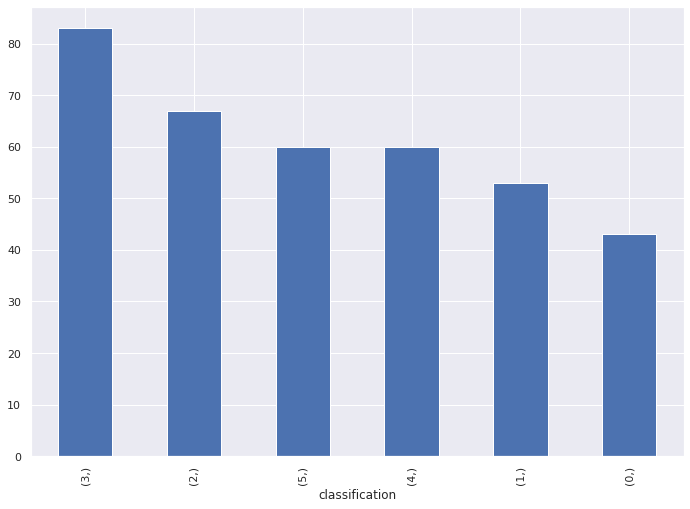

In [23]:
df_agrup = df_predicted.value_counts()
ax = df_agrup.plot.bar(y=0)

Text(0.5, 1.0, 'Incorrect Number of Blobs')

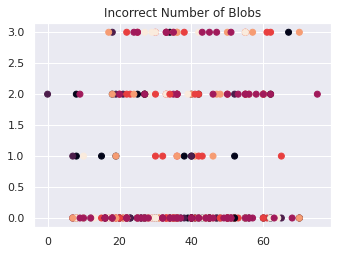

In [24]:
plt.subplot(221)
plt.scatter(dataset['age'], dataset['clubbing_of_the_rete_ridges'], c=predicted)
plt.title("Incorrect Number of Blobs")
